In [1]:
# input_dir = "/Users/chenghsi/chchao/NYU/DataScienceCourse/yelp/"
input_dir = "/home/ubuntu/chchao/"

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [4]:
USERPATH = input_dir + "yelp_dataset/yelp_academic_dataset_user.json"
REVIEWPATH = input_dir + "yelp_dataset/yelp_academic_dataset_review.csv"
TOR_BUS_PATH = input_dir + "yelp_dataset/yelp_toronto_business.pickle"
VEGAS_BUS_PATH = input_dir + "yelp_dataset/yelp_vegas_business.pickle"
MONTREAL_BUS_PATH = input_dir + "yelp_dataset/yelp_montreal_business.pickle"
PHOENIX_BUS_PATH = input_dir + "yelp_dataset/yelp_phoenix_business.pickle"
BUS_PATH = input_dir + "yelp_dataset/yelp_academic_dataset_business.pickle"
PROCCESSED_BUS_PATH = input_dir + "yelp_dataset/df_convert/yelp_academic_dataset_business.pickle"
CITY_LIST = input_dir + "city_cnt_list"
STATE_LIST = input_dir + "state_cnt_list"

In [5]:
default_feature_list = ['stars', 'review_count', 'Ambience_romantic', 'Ambience_intimate', 'Ambience_classy',
 'Ambience_hipster', 'Ambience_touristy', 'Ambience_trendy',
 'Ambience_upscale', 'Ambience_casual', 'BikeParking', 'BusinessAcceptsCreditCards', 'BusinessParking_garage',
 'BusinessParking_street', 'BusinessParking_validated', 'BusinessParking_lot',
 'BusinessParking_valet', 'Caters', 'GoodForKids', 'GoodForMeal_dessert',
 'GoodForMeal_latenight', 'GoodForMeal_lunch', 'GoodForMeal_dinner',
 'GoodForMeal_breakfast', 'GoodForMeal_brunch', 'HasTV', 'OutdoorSeating', 'RestaurantsDelivery',
 'RestaurantsGoodForGroups', 'RestaurantsReservations', 'RestaurantsTableService', 'RestaurantsTakeOut', 'Music_dj', 'Music_background_music', 'Music_no_music', 'Music_karaoke',
 'Music_live', 'Music_video', 'Music_jukebox', 'DogsAllowed', 'Open24Hours', 'RestaurantsCounterService']

In [46]:
import pickle

def pickle_to_df(pickle_path, verbose=False, save_pickle=False, include_categories=False):
    serial_pickle = pd.read_pickle(pickle_path)
    df = pd.DataFrame.from_dict(serial_pickle, orient='index')
    
    if not include_categories:
        features = []
    else:
        features = ['categories']
        
    bool_map = {'True': True,'False': False}
    if "business" in pickle_path:
        # columns_to_exclude = ['business_id', 'name', 'address', 'is_open']

        df = df[df['categories'].notnull()] # drop row with null categories
        df = df[df['categories'].str.contains('Restaurant')] # select only rows with restaurant as categories
        
        for col in df.columns.values:
            df[col].map(bool_map)
        
        for feature in df.columns:       
            # if feature not in columns_to_exclude:
            if feature in default_feature_list:
                features.append(feature)
        
        # store the df as pickle for use
        if save_pickle:
            df.to_pickle(input_dir + "yelp_dataset/df_convert/" + pickle_path.split('/')[-1])

        # return df[features].fillna(-1), df[["is_open"]]
        return df

In [7]:
def feature_target_seperator(df, custom_feature_list=None, fillna_placeholder=-1, include_categories=False):
    '''
    This function seperates a unprocessed(or processed) business dataframe and seperates it into FEATURE and TARGET
    '''
    features = []
    if not custom_feature_list:
        feature_list = default_feature_list
    else:
        feature_list = custom_feature_list
    if include_categories:
        # print (df['categories'])
        features = ['categories']
    for feature in df.columns:       
        # if feature not in columns_to_exclude:
        if feature in feature_list:
            features.append(feature)
    # if include_categories:
    #     print (df['categories'])
    return df[features].fillna(fillna_placeholder), df[["is_open"]]

In [28]:
def create_raw_dataframe_from_raw_business_pickle():
    # X, Y = pickle_to_df(BUS_PATH) # This would create a preprocessed pickle
    df = pd.DataFrame(pd.read_pickle(BUS_PATH)).T
    return df

raw_bus_df = create_raw_dataframe_from_raw_business_pickle()

In [47]:
def create_processed_dataframe_from_raw_business_pickle():
    return pickle_to_df(BUS_PATH)

processed_bus_df = create_processed_dataframe_from_raw_business_pickle()

In [30]:
def naive_modeling_with_all_data():
    '''
    This function throws every row into the SVM, not a good idea.
    '''
    X, Y = feature_target_seperator(raw_bus_df)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)
    svm_model = svm.SVC(kernel='linear')
    svm_model.fit(X_train, Y_train.values.ravel())
    svm_model.score(X_test, Y_test)

In [51]:
def print_naive_result(svm_model):
    '''
    Legacy print result
    '''
    print ( "Accuracy on training = %.6f" % metrics.accuracy_score(svm_model.predict(X_train), Y_train) )
    print ( "Accuracy on test = %.6f" % metrics.accuracy_score(svm_model.predict(X_test), Y_test) )

    vegas_X, vegas_Y = feature_target_seperator(pickle_to_df(VEGAS_BUS_PATH))
    print ( "Accuracy on Vegas = %.6f" % metrics.accuracy_score(svm_model.predict(vegas_X), vegas_Y) )

    pho_X, pho_Y = feature_target_seperator(pickle_to_df(PHOENIX_BUS_PATH))
    print ( "Accuracy on Phoenix = %.6f" % metrics.accuracy_score(svm_model.predict(pho_X), pho_Y) )

    # mon_X, mon_Y = pickle_to_df(MONTREAL_BUS_PATH)
    # print ( "Accuracy on Montreal = %.6f" % metrics.accuracy_score(svm_model.predict(mon_X), mon_Y) )

    tor_X, tor_Y = feature_target_seperator(pickle_to_df(TOR_BUS_PATH))
    print ( "Accuracy on Montreal = %.6f" % metrics.accuracy_score(svm_model.predict(tor_X), tor_Y) )

    bus_X, bus_Y = feature_target_seperator(pickle_to_df(BUS_PATH))
    print ( "Accuracy on All = %.6f" % metrics.accuracy_score(svm_model.predict(bus_X), bus_Y) )

In [32]:
def naive_model_validate_process(svm_model):
    Charlotte_svm_model = create_svm_model(city_dfs['NC']['Charlotte'])
    evaulate_model_against_all(Charlotte_svm_model)
    evaulate_model_by_state(svm_model, 'NC')

In [53]:
# Create df hashmap of city_dfs[state][city]
def create_city_dfs(df, save_pickle = False):
    city_dfs = {}
    with open(CITY_LIST, 'r') as city_list:
        for line in city_list:
            city = line.split('|')[0].strip()
            state = line.split('|')[1].strip()
            count = line.split('|')[2].strip()
            city_df = df.loc[df['city'] == city]
            if save_pickle:
                city_df.to_pickle(input_dir + "yelp_dataset/df_convert/" + state + "_" + city + ".pickle")
            try:
                type(city_dfs[state])
            except:
                city_dfs[state] = {}
            city_dfs[state][city] = city_df
        return city_dfs


In [55]:
city_dfs = create_city_dfs(processed_bus_df)
print (city_dfs.keys())

dict_keys(['NC', 'AZ', 'QC', 'PA', 'BW', 'OH', 'SC', 'WI', 'ON', 'EDH', 'NV', 'IL'])


In [57]:
# Create df hashmap of state_dfs[state]
def create_state_dfs(df, save_pickle = False):
    state_dfs = {}
    with open(STATE_LIST, 'r') as state_list:
        for line in state_list:
            state = line.split('|')[0].strip()
            count = line.split('|')[1].strip()
            state_df = df.loc[df['state'] == state]
            if int(count) > 100:
                state_dfs[state] = state_df
    return state_dfs


In [67]:
state_dfs = create_state_dfs(processed_bus_df)
print (state_dfs.keys())

dict_keys(['AZ', 'NC', 'QC', 'PA', 'BW', 'OH', 'SC', 'WI', 'ON', 'HLD', 'EDH', 'NV', 'IL', 'MLN'])


In [287]:
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn.svm import LinearSVC

# def create_svm_model(df, df_target=pd.DataFrame(np.nan, index=[0,1], columns=['foo']), gridcv=False, verbose=False, model='svc', custom_feature_list=None):
def create_svm_model(df, df_target=None, gridcv=False, verbose=False, model='svc', custom_feature_list=None):
    if df_target:
        # X, Y as input instead of a whole df
        X = df
        Y = df_target
    else:
        X, Y = feature_target_seperator(df, custom_feature_list=custom_feature_list)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

    if model == "svc":
        # svm_model = svm.SVC()
        svm_model = svm.SVC(kernel="linear", probability=True)
    elif model == "LinearSVC":
        svm_model = LinearSVC()
    # svm_model = svm.SVC(C=10, gamma=0.001, kernel='rbf', probability=True)
    svm_model.fit(X_train, Y_train.values.ravel())
    if verbose:
        print ( "Data shape:", X_train.shape)
        print ( "Accuracy on training = %.6f" % metrics.accuracy_score(svm_model.predict(X_train), Y_train) )
        print ( "Accuracy on test = %.6f" % metrics.accuracy_score(svm_model.predict(X_test), Y_test) )
        try:
            print ("Area under the ROC curve on test data = %.3f (SVM)" % metrics.roc_auc_score(Y_test, svm_model.predict(X_test)))
        except:
            pass
        try:
            scores = cross_val_score(LinearSVC(), X, Y.values.ravel(), cv=10)
            print("Cross Val Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        except:
            pass
        print (print_report(svm_model, X_test, Y_test))
        print ('\n')

    '''
    Y_test_probability_1 = svm_model.predict_proba(X_test)[:, 1]

    # Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_test_probability_1)
    
    # Get the area under the curve (AUC)
    auc = np.mean(cross_val_score(svm_model, X, Y.values.ravel(), scoring="roc_auc"))

    # Plot the ROC curve
    plt.plot(fpr, tpr, label="AUC = " + str(round(auc, 2)))
    
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.plot([0,1], [0,1], 'k--', label="Random")
    plt.legend(loc=2)
    '''
    # predicted = cross_val_predict(svm_model, X, Y, cv=10)
    # print ( "cross validation score = %.6f" % metrics.accuracy_score(Y, predicted))

    return svm_model

In [207]:
X, Y = feature_target_seperator(state_dfs['AZ'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)
svm_model = svm.SVC(kernel="linear", probability=True)
svm_model.fit(X_train, Y_train.values.ravel())
Y_test_probability_1 = svm_model.predict_proba(X_test)[:, 1]

# Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_test_probability_1)
    
# Get the area under the curve (AUC)
auc = np.mean(cross_val_score(svm_model, X, Y.values.ravel(), scoring="roc_auc"))

# Plot the ROC curve
plt.plot(fpr, tpr, label="AUC = " + str(round(auc, 2)))
    
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc=2)

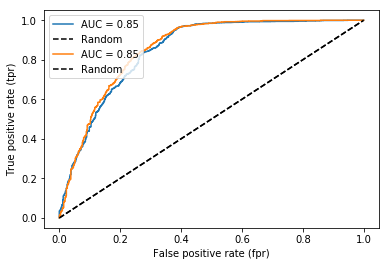

In [210]:
plt.show()

In [61]:
def evaulate_model_by_cities_in_state(svm_model, state):
    '''
    This function loop through all the cities of the state and use the model on it
    '''
    for city in city_dfs[state].keys():
        test_X, test_Y = feature_target_seperator(city_dfs[state][city])
        print ( "Accuracy on %s = %.6f" % (city, metrics.accuracy_score(svm_model.predict(test_X), test_Y) ))
        print ("Area under the ROC curve on test data = %.3f (SVM)" % metrics.roc_auc_score(test_Y, svm_model.predict(test_X)))


In [62]:
def evaulate_model_by_just_state(svm_model, state, verbose=False):
    '''
    This function use the model on the given state and return the auc 
    '''
    state_df = state_dfs[state]
    test_X, test_Y = feature_target_seperator(state_df)
    auc = metrics.roc_auc_score(test_Y, svm_model.predict(test_X))
    if verbose:
        print ( "Accuracy on test = %.6f" % metrics.accuracy_score(svm_model.predict(X_test), Y_test) )
        print ("Area under the ROC curve on test data = %.3f (SVM)" % auc)
    return auc


In [63]:
def evaulate_model_against_all(svm_model):
    '''
    This function test the model against all available business datas
    '''
    bus_df = pd.read_pickle(PROCCESSED_BUS_PATH)
    test_X, test_Y = feature_target_seperator(bus_df)
    auc = metrics.roc_auc_score(test_Y, svm_model.predict(test_X))
    print ( "Accuracy on total = %.6f" % (metrics.accuracy_score(svm_model.predict(test_X), test_Y) ))
    print ("Area under the ROC curve on test data = %.3f (SVM)" % auc)

In [64]:
def print_report(clf, X_test, Y_test):
    y_true, y_pred = Y_test, clf.predict(X_test)
    print(sklearn.metrics.classification_report(y_true, y_pred))

In [288]:
'''
Create hashmap of models for each state
'''
def create_state_models(state_dfs):
    state_models = {}
    for state_df in state_dfs.keys():
        print ("Creating model for %s" %(state_df))
        state_models[state_df] = create_svm_model(state_dfs[state_df], verbose=False)
    return state_models
# print (state_dfs['AZ'].shape)
state_models = create_state_models(state_dfs)

Creating model for AZ
Creating model for NC
Creating model for QC
Creating model for PA
Creating model for BW
Creating model for OH
Creating model for SC
Creating model for WI
Creating model for ON
Creating model for HLD
Creating model for EDH
Creating model for NV
Creating model for IL
Creating model for MLN


In [ ]:
Y_test_probability_1 = model.predict_proba(X_test)[:, 1]

# Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_test_probability_1)
    
# Get the area under the curve (AUC)
auc = np.mean(cross_val_score(model, X, Y, scoring="roc_auc"))

# Plot the ROC curve
plt.plot(fpr, tpr, label="AUC (C=" + str(c) + ") = " + str(round(auc, 2)))
    
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc=2)

In [175]:
'''
Create a matrix of state_models used against other states
'''
def state_models_auc_matrix(state_models):
    d = {}
    # row_index = []
    state_auc_matrix = pd.DataFrame(columns=state_models.keys()) 
    for state_model in state_models.keys():
        state_dict = {}
        for state in state_dfs.keys():
            state_dict[state] = evaulate_model_by_just_state(state_models[state_model], state)
        # row_index.append(state_mod)
            # state_auc_matrix.append(state_dict[state])
            d[state_model] = state_dict 
        # d.append(state_dict)

    print (d['AZ'])
    state_auc_matrix = pd.DataFrame(d)
    return state_auc_matrix.T


In [176]:
state_auc_matrix = state_models_auc_matrix(state_models)

{'AZ': 0.73133969201801186, 'NC': 0.70884459122839705, 'QC': 0.60942416716775916, 'PA': 0.66578491094938186, 'BW': 0.55809063034163409, 'OH': 0.6636229579600853, 'SC': 0.68618881118881114, 'WI': 0.71349553518337538, 'ON': 0.66488517557406057, 'MLN': 0.60333333333333328, 'EDH': 0.67171894215407957, 'NV': 0.68685651003055259, 'IL': 0.70942312295539778, 'HLD': 0.67592592592592604}


In [179]:
state_auc_matrix2 = state_models_auc_matrix({k:state_models[k] for k in ['AZ', 'EDH', 'IL', 'NC', 'NV',
                                                          'OH', 'ON', 'PA', 'SC'] if k in state_models})

{'AZ': 0.73133969201801186, 'NC': 0.70884459122839705, 'QC': 0.60942416716775916, 'PA': 0.66578491094938186, 'BW': 0.55809063034163409, 'OH': 0.6636229579600853, 'SC': 0.68618881118881114, 'WI': 0.71349553518337538, 'ON': 0.66488517557406057, 'MLN': 0.60333333333333328, 'EDH': 0.67171894215407957, 'NV': 0.68685651003055259, 'IL': 0.70942312295539778, 'HLD': 0.67592592592592604}


In [188]:
'''
http://scikit-learn.org/dev/auto_examples/manifold/plot_mds.html
'''

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

def plot_distance(state_auc_matrix):
    # n_samples = 20
    seed = np.random.RandomState(seed=3)
    # X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)
    # X_true = X_true.reshape((n_samples, 2))
    labels = state_auc_matrix.columns
    # print (labels)
    X_true = state_auc_matrix
    X_true.apply(np.reciprocal)
    # Center the data
    # print (X_true)
    X_true -= X_true.mean()
    distance_matrix = X_true

    similarities = euclidean_distances(X_true)

    # Add noise to the similarities
    # noise = np.random.rand(n_samples, n_samples)
    # noise = noise + noise.T
    # noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
    # similarities += noise

    mds = manifold.MDS(n_components=14, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
    pos = mds.fit(similarities).embedding_

    nmds = manifold.MDS(n_components=14, metric=False, max_iter=3000, eps=1e-12,
                        dissimilarity="precomputed", random_state=seed, n_jobs=1,
                        n_init=1)
    npos = nmds.fit_transform(similarities, init=pos)

    # Rescale the data
    pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
    npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

    # Rotate the data
    clf = PCA(n_components=2)
    X_true = clf.fit_transform(X_true)

    pos = clf.fit_transform(pos)

    npos = clf.fit_transform(npos)

    fig = plt.figure(1)
    ax = plt.axes([0., 0., 1., 1.])

    s = 40
    plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0, label='True Position')
    plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
    plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
    plt.legend(scatterpoints=1, loc='best', shadow=False)

    similarities = similarities.max() / similarities * 100
    similarities[np.isinf(similarities)] = 0

    # Plot the edges
    start_idx, end_idx = np.where(pos)
    # a sequence of (*line0*, *line1*, *line2*), where::
    #            linen = (x0, y0), (x1, y1), ... (xm, ym)
    segments = [[X_true[i, :], X_true[j, :]]
                for i in range(len(pos)) for j in range(len(pos))]
    values = np.abs(similarities)
    lc = LineCollection(segments,
                        zorder=0, cmap=plt.cm.Blues,
                        norm=plt.Normalize(0, values.max()))

    lc.set_array(similarities.flatten())
    lc.set_linewidths(0.5 * np.ones(len(segments)))
    ax.add_collection(lc)

    for label, x, y in zip(labels, X_true[:, 0], X_true[:, 1]):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-2, 2),
            textcoords='offset points', ha='right', va='bottom')
            # bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
            # arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    '''
    for label, x, y in zip(labels, pos[:, 0], pos[:, 1]):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-2, 2),
            textcoords='offset points', ha='right', va='bottom')
    '''
        
    plt.show()


/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in true_divide


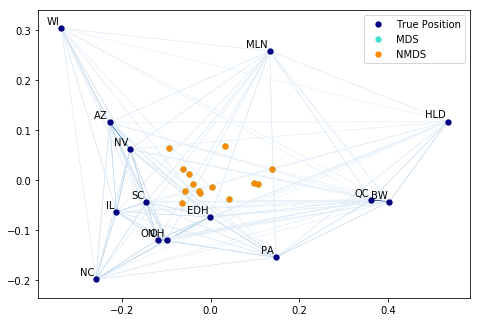

In [189]:
plot_distance(state_auc_matrix)

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in true_divide


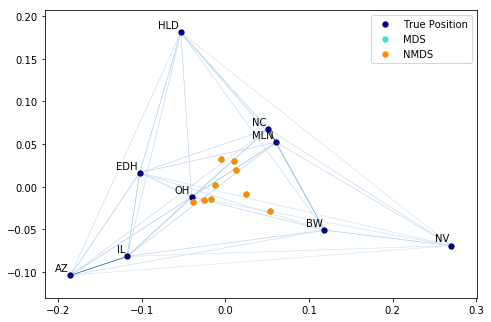

In [190]:
plot_distance(state_auc_matrix2)

In [192]:
"""
clustering result by State
"""
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

X_true = state_auc_matrix2
X_true.apply(np.reciprocal)
X_true -= X_true.mean()
distance_matrix = X_true
labels = state_auc_matrix2.columns

db = DBSCAN(metric="euclidean", eps=0.175, min_samples=2).fit(distance_matrix)
# db = DBSCAN(metric="precomputed").fit(distance_matrix)
# print (db.labels_)
# db = DBSCAN(eps=0.3, min_samples=10).fit(distance_matrix)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
cluster_labels = db.labels_

result_dict = {}
for a_set in zip(cluster_labels, labels):
    if a_set[0] not in result_dict.keys():
        result_dict[a_set[0]] = [a_set[1]]
    else:
        result_dict[a_set[0]].append(a_set[1])

print (result_dict)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))
# """

ignore = '''
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X_true = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X_true)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
'''
ignore2 = '''
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X_true[class_member_mask & core_samples_mask]
    print (xy)
    # print (col)
    # plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
    #          markeredgecolor='k', markersize=14)

    xy = X_true[class_member_mask & ~core_samples_mask]
    print ("second", xy)
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
'''

{0: ['AZ', 'EDH', 'IL'], 1: ['BW', 'MLN', 'NC'], -1: ['HLD', 'NV', 'OH']}
Estimated number of clusters: 2


In [181]:
cluster_0_eps01_df = pd.concat([state_dfs[x] for x in result_dict[0]])
cluster_1_eps01_df = pd.concat([state_dfs[x] for x in result_dict[1]])
cluster_minus1_eps01_df = pd.concat([state_dfs[x] for x in result_dict[-1]])
cluster_2_df = pd.concat([state_dfs[x] for x in result_dict[2]])

cluster_eps01_dfs = [cluster_minus1_eps01_df, cluster_0_eps01_df, cluster_1_eps01_df, cluster_2_df]
# cluster0_eps2_df = pd.concat([just_state_dfs['AZ'], just_state_dfs['IL'], just_state_dfs['NC'], 
#                          just_state_dfs['NV'], just_state_dfs['OH'], just_state_dfs['ON'], just_state_dfs['PA']])


In [142]:
cluster_eps01_models = []
for df in cluster_dfs:
    cluster_eps01_models.append(create_svm_model(df, model='LinearSVC'))

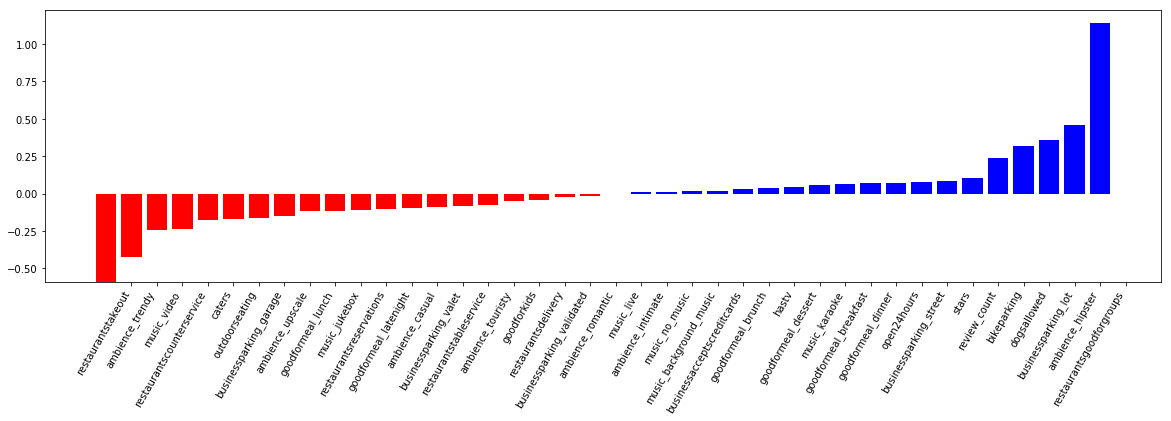

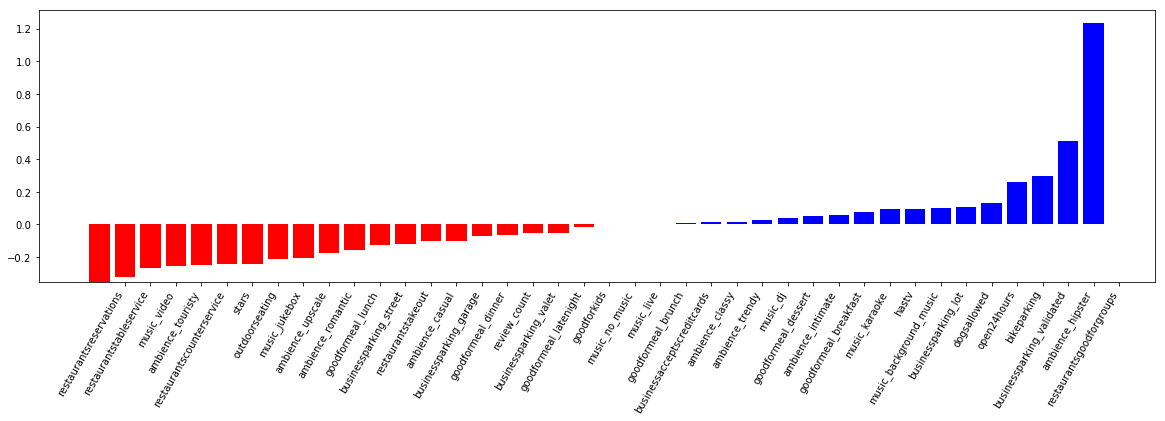

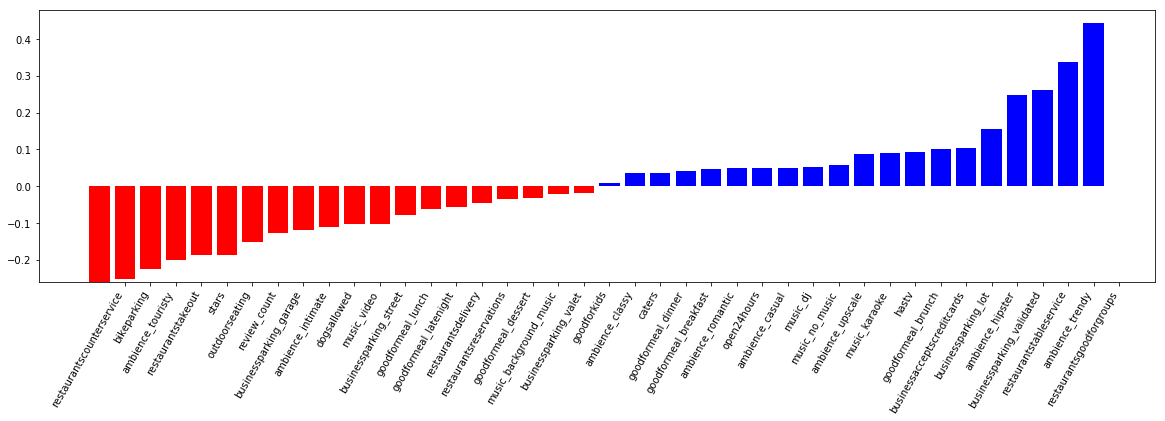

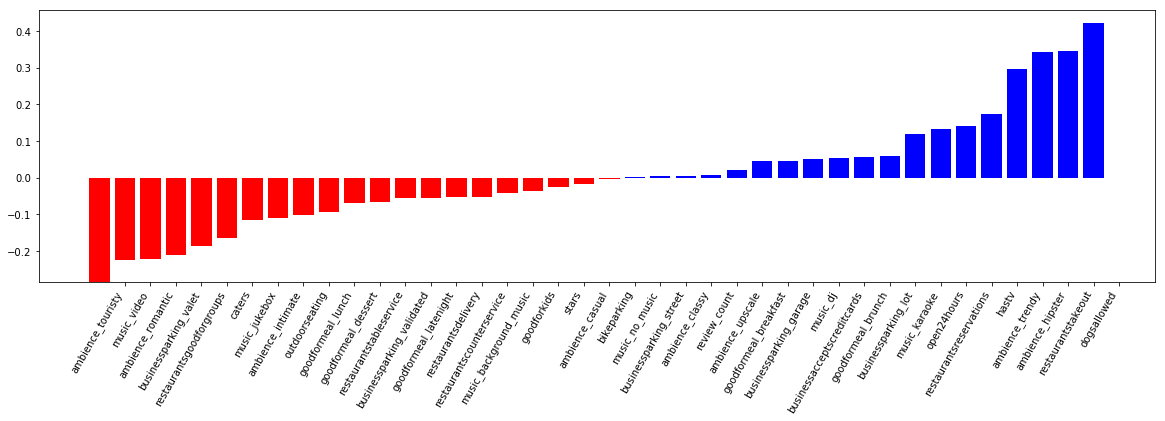

In [182]:
# https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
from sklearn.feature_extraction.text import CountVectorizer
top_positive_feature_list = []
top_negative_feature_list = []

def get_coefficeints(classifier, feature_names, top_features):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    add_count_for_features(top_positive_coefficients, top_negative_coefficients, feature_names)
    # top_positive_feature_list = []
    # top_negative_feature_list = []
    for i in top_positive_coefficients[::-1]:
        top_positive_feature_list.append(feature_names[i]) 
    for i in top_negative_coefficients[::-1]:
        top_negative_feature_list.append(feature_names[i])

    # print ("top_positive_feature_list:", top_positive_feature_list)
    # print ("top_negative_feature_list:", top_negative_feature_list)
    return coef, top_coefficients

    
def plot_coefficients(classifier, feature_names, top_features=20):
    # create plot
    coef, top_coefficients = get_coefficeints(classifier, feature_names, top_features)
    plt.figure(figsize=(20, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()
    
    
def add_count_for_features(top_positive_coefficients, top_negative_coefficients, feature_names):
    for i in top_positive_coefficients[::-1]:
        try: 
            total_positive_feature_count[feature_names[i]] += 1
        except:
            total_positive_feature_count[feature_names[i]] = 1
            
    for i in top_negative_coefficients[::-1]:
        try: 
            total_negative_feature_count[feature_names[i]] += 1
        except:
            total_negative_feature_count[feature_names[i]] = 1
            
# X, Y = feature_target_seperator(cluster_0_eps01_df)
# cv = CountVectorizer()
# cv.fit(X)
# print (len(cv.vocabulary_))
# print (cv.get_feature_names())
# X_train = cv.transform(X)

# plot_coefficients(cluster_eps01_models[1], cv.get_feature_names())
# print(top_negative_feature_list)
# print ("new feature list")
# new_feature_list = [x for x in default_feature_list if x not in top_negative_feature_list]

# svm = LinearSVC()
# svm.fit(X, Y.values.ravel())
# total_positive_feature_count = {}
# total_negative_feature_count = {}

for i in range(len(cluster_eps01_models)):
    X, Y = feature_target_seperator(cluster_eps01_dfs[i])
    cv = CountVectorizer()
    cv.fit(X)
    plot_coefficients(cluster_eps01_models[i], cv.get_feature_names(), top_features=20)

# print (total_positive_feature_count)
# print (total_negative_feature_count)
# plot_coefficients(cluster0_LinearSVC_model, cv.get_feature_names())

In [27]:
for state in state_models.keys():
    X, Y = feature_target_seperator(state_dfs[state])
    cv = CountVectorizer()
    cv.fit(X)
    plot_coefficients(state_models[state], cv.get_feature_names(), top_features=20)

NameError: name 'state_models' is not defined

In [170]:
cluster_0_eps01_model =create_svm_model(cluster_0_eps01_df, verbose= True)


Accuracy on training = 0.867201
Accuracy on test = 0.862447
Area under the ROC curve on test data = 0.774 (SVM)
Cross Val Accuracy: 0.86 (+/- 0.02)
Accuracy on training = 0.869433
Accuracy on test = 0.867316
Area under the ROC curve on test data = 0.783 (SVM)
Cross Val Accuracy: 0.87 (+/- 0.02)


In [211]:
'''
https://stats.stackexchange.com/questions/168330/does-removing-mildly-correlated-features-0-5-improve-performance-in-predictive
Trying to remove mildly correlated features, seems promising
'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, Y = feature_target_seperator(cluster_0_eps01_df, fillna_placeholder=2)
print ("orign:", X.shape)
X_new = SelectKBest(chi2, k=20).fit_transform(X, Y)
# print (X_new.head)
X_new = pd.DataFrame(X_new)

cluster_0_eps01_model = create_svm_model(df=X, df_target=Y, verbose= True)
cluster_0_eps01_model2 = create_svm_model(df=X_new, df_target=Y, verbose= True)

orign: (13143, 42)
Accuracy on training = 0.863041
Accuracy on test = 0.839014
Area under the ROC curve on test data = 0.747 (SVM)
Cross Val Accuracy: 0.85 (+/- 0.02)
Accuracy on training = 0.850867
Accuracy on test = 0.850578
Area under the ROC curve on test data = 0.752 (SVM)
Cross Val Accuracy: 0.85 (+/- 0.03)


In [213]:
from sklearn.learning_curve import learning_curve
def draw_learning_curve(model, X_train, Y_train):
    title = 'Learning Curves (SVM)'
    plot_learning_curve(model, title, X_train, Y_train, cv=10)
    plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [216]:
'''
Analysis of variance (ANOVA) with default svm on given data
'''
from sklearn import svm, datasets, feature_selection
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
def plot_anova_for_df(X, Y):
    transform = feature_selection.SelectPercentile(feature_selection.f_classif)
    clf = Pipeline([('anova', transform), ('svc', svm.SVC())])
    score_means = list()
    score_stds = list()
    percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

    for percentile in percentiles:
        clf.set_params(anova__percentile=percentile)
        # Compute cross-validation score using 1 CPU
        this_scores = cross_val_score(clf, X, Y.values.ravel(), n_jobs=1)
        score_means.append(this_scores.mean())
        score_stds.append(this_scores.std())

    plt.errorbar(percentiles, score_means, np.array(score_stds))

    plt.title(
        'Performance of the SVM-Anova varying the percentile of features selected')
    plt.xlabel('Percentile')
    plt.ylabel('Prediction rate')

    plt.axis('tight')
    plt.show()

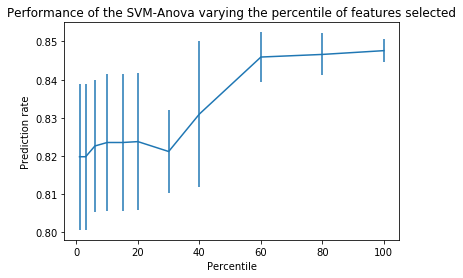

In [217]:
plot_anova_for_df(X,Y)

KeyError: 'categories'

In [148]:
'''
Group significant features by appearance in models
'''
# sorted(total_positive_feature_count, key=total_positive_feature_count.get, reverse=True)
from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(total_positive_feature_count.items()):
    v[value].append(key)
print (v)

defaultdict(<class 'list'>, {1: ['ambience_casual', 'ambience_romantic', 'businessparking_garage', 'caters', 'restaurantsreservations', 'restaurantstableservice', 'restaurantstakeout', 'stars'], 3: ['ambience_classy', 'ambience_trendy', 'bikeparking', 'dogsallowed', 'music_dj', 'restaurantsgoodforgroups'], 4: ['ambience_hipster', 'businessacceptscreditcards', 'businessparking_lot', 'goodformeal_breakfast', 'goodformeal_brunch', 'hastv', 'music_karaoke', 'music_no_music', 'open24hours'], 2: ['ambience_intimate', 'ambience_upscale', 'businessparking_street', 'businessparking_validated', 'goodformeal_dessert', 'goodformeal_dinner', 'music_background_music', 'music_live', 'review_count']})


In [105]:
evaulate_model_by_just_state(cluster0_svm_model, 'AZ', verbose= True) 
evaulate_model_by_just_state(cluster0_2_svm_model, 'AZ', verbose= True)
evaulate_model_by_just_state(cluster0_LinearSVC_model, 'AZ', verbose= True) 


Accuracy on test = 0.810294
Area under the ROC curve on test data = 0.794 (SVM)
Accuracy on test = 0.822418
Area under the ROC curve on test data = 0.786 (SVM)
Accuracy on test = 0.800313
Area under the ROC curve on test data = 0.776 (SVM)


0.77635558109293246

In [98]:
evaulate_model_against_all(cluster0_svm_model)
evaulate_model_against_all(cluster0_2_svm_model)

Accuracy on total = 0.814200
Area under the ROC curve on test data = 0.721 (SVM)
Accuracy on total = 0.826903
Area under the ROC curve on test data = 0.719 (SVM)


In [ ]:
evaulate_model_against_all(create_svm_model(pd.read_pickle(PROCCESSED_BUS_PATH)))

In [94]:
 

evaulate_model_by_just_state(cluster0_svm_model, 'NC', verbose= True)
evaulate_model_by_just_state(cluster0_2_svm_model, 'NC', verbose= True) 

evaulate_model_by_just_state(cluster0_svm_model, 'NV', verbose= True) 
evaulate_model_by_just_state(cluster0_2_svm_model, 'NV', verbose= True) 

evaulate_model_by_just_state(cluster0_svm_model, 'IL', verbose= True) 
evaulate_model_by_just_state(cluster0_2_svm_model, 'IL', verbose= True) 


evaulate_model_by_just_state(cluster0_svm_model, 'MLN', verbose= True)
evaulate_model_by_just_state(cluster0_2_svm_model, 'MLN', verbose= True) 



# evaulate_model_by_just_state(cluster0_svm_model, 'IL', verbose= True) 
# evaulate_model_by_just_state(cluster0_svm_model, 'PA', verbose= True)  
# evaulate_model_by_just_state(cluster3_svm_model, 'NC', verbose= True)  

Accuracy on test = 0.810294
Area under the ROC curve on test data = 0.794 (SVM)
Accuracy on test = 0.822418
Area under the ROC curve on test data = 0.786 (SVM)
Accuracy on test = 0.810294
Area under the ROC curve on test data = 0.754 (SVM)
Accuracy on test = 0.822418
Area under the ROC curve on test data = 0.758 (SVM)
Accuracy on test = 0.810294
Area under the ROC curve on test data = 0.755 (SVM)
Accuracy on test = 0.822418
Area under the ROC curve on test data = 0.750 (SVM)
Accuracy on test = 0.810294
Area under the ROC curve on test data = 0.750 (SVM)
Accuracy on test = 0.822418
Area under the ROC curve on test data = 0.740 (SVM)
Accuracy on test = 0.810294
Area under the ROC curve on test data = 0.566 (SVM)
Accuracy on test = 0.822418
Area under the ROC curve on test data = 0.621 (SVM)


0.62111111111111117

In [99]:
# http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_digits.html
from sklearn.svm import SVC
X, Y = feature_target_seperator(state_dfs['NC']['Charlotte'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.5)
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, Y_train.values.ravel())

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
   

# Tuning hyper-parameters for precision



/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anacond

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.387 (+/-0.001) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.387 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.865 (+/-0.061) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.387 (+/-0.001) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.827 (+/-0.071) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.853 (+/-0.054) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.752 (+/-0.067) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.826 (+/-0.069) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.839 (+/-0.053) for {'C': 1, 'kernel': 'linear'}
0.843 (+/-0.052) for {'C': 10, 'kernel': 'linear'}
0.836 (+/-0.043) for {'C': 100, 'kernel': 'linear'}
0.833 (+/-0.043) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.



NameError: name 'y_test' is not defined

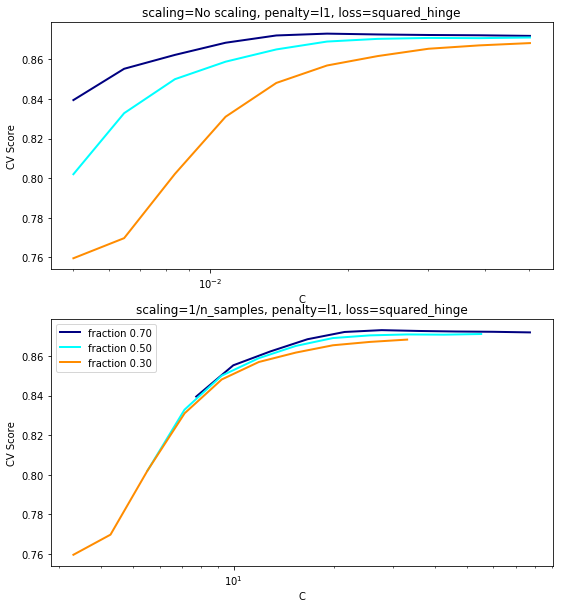

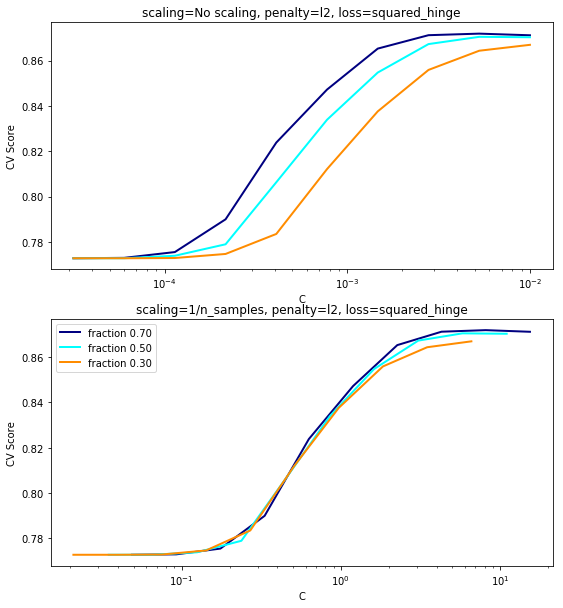

In [145]:

from sklearn.svm import LinearSVC
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.utils import check_random_state
from sklearn import datasets
clf_sets = [(LinearSVC(penalty='l1', loss='squared_hinge', dual=False,
                       tol=1e-3),
             np.logspace(-2.3, -1.3, 10), X, Y.values.ravel()),
            (LinearSVC(penalty='l2', loss='squared_hinge', dual=True,
                       tol=1e-4),
             np.logspace(-4.5, -2, 10), X, Y.values.ravel())]

colors = ['navy', 'cyan', 'darkorange']
lw = 2
n_samples = X.shape[0]
train_size = X.shape[1]
for fignum, (clf, cs, X, y) in enumerate(clf_sets):
    # set up the plot for each regressor
    plt.figure(fignum, figsize=(9, 10))

    for k, train_size in enumerate(np.linspace(0.3, 0.7, 3)[::-1]):
        param_grid = dict(C=cs)
        # To get nice curve, we need a large number of iterations to
        # reduce the variance
        grid = GridSearchCV(clf, refit=False, param_grid=param_grid,
                            cv=ShuffleSplit(train_size=train_size,
                                            n_splits=250, random_state=1))
        grid.fit(X, y)
        scores = grid.cv_results_['mean_test_score']

        scales = [(1, 'No scaling'),
                  ((n_samples * train_size), '1/n_samples'),
                  ]

        for subplotnum, (scaler, name) in enumerate(scales):
            plt.subplot(2, 1, subplotnum + 1)
            plt.xlabel('C')
            plt.ylabel('CV Score')
            grid_cs = cs * float(scaler)  # scale the C's
            plt.semilogx(grid_cs, scores, label="fraction %.2f" %
                         train_size, color=colors[k], lw=lw)
            plt.title('scaling=%s, penalty=%s, loss=%s' %
                      (name, clf.penalty, clf.loss))

    plt.legend(loc="best")
plt.show()

In [ ]:
# from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

if 1==1:

    # np.random.seed(0) # seed to shuffle the train set

    n_folds = 2
    n_threads = 2
    
	# verbose = False
    # shuffle = False

    print ('Loading train and test sets')
    X_0, Y_0 = feature_target_seperator(state_dfs['AZ'])
    # X = pd.DataFrame.as_matrix(X)
    # Y = pd.DataFrame.as_matrix(Y)
    # print (X)
    # print (type(Y))
    X, testset, Y, testset_label = train_test_split(X_0, Y_0, train_size=.75)
    # print ("shape:", X.shape)
    # train_label = testset
    # trainset, train_label, testset = load_data.load()
    print ('Finished feature engineering for train and test sets')

    # if shuffle:
    #   idx = np.random.permutation(train_label.size)
    #   trainset = trainset[idx]
    #   train_label = train_label[idx]

    # Level 0 classifiers
    # clfs = [RandomForestClassifier(n_estimators=10, n_jobs=n_threads, criterion='gini'),
    #         RandomForestClassifier(n_estimators=10, n_jobs=n_threads, criterion='entropy'),
    #         ExtraTreesClassifier(n_estimators=10, n_jobs=n_threads, criterion='gini'),
    #         ExtraTreesClassifier(n_estimators=10, n_jobs=n_threads, criterion='entropy'),
    #         GradientBoostingClassifier(n_estimators=10, learning_rate=0.05, subsample=0.5, max_depth=6)]
    
    clfs = [state_models[x] for x in state_models.keys()]

    # Stratified random shuffled cross validation
    skf = StratifiedKFold(n_splits=2)
    skf.get_n_splits(X, Y)
    # print (skf)
    # for train_index, test_index in skf.split(trainset, testset.values.ravel()):
    #     print("TRAIN:", train_index, "TEST:", test_index)
    # skf = [train_index for train_index, test_index in skf.split(trainset, testset.values.ravel())]
    # print (skf)
    # print (testset.values.ravel())
    # skf = sklearn.cross_validation.StratifiedKFold(train_label.values.ravel(), n_folds, shuffle=True)
    # print (skf)
    # exit()
    # skf = list(StratifiedKFold(train_label, n_folds, shuffle=True))


    print ('Creating train and test sets for blending')

    # Create train and test sets for blending and Pre-allocate the data
    blend_train = np.zeros((trainset.shape[0], len(clfs)))
    blend_test = np.zeros((testset.shape[0], len(clfs)))

    # For each classifier, we train the number of fold times (=len(skf))
    for clf_index, clf in enumerate(clfs):
        print ('Training classifier [%s]' % (clf_index + 1))
        print (clf)

        # blend_test_j = np.zeros((testset.shape[0], len(skf)))  # Number of testing data x Number of folds , we will take the mean of the predictions
        blend_test_j = np.zeros((testset.shape[0], n_folds))
        # print ("len(skf):", len(skf))
        
        fold_index = 0
        # for train_index, valid_index in skf:
        print (X.shape, Y.shape)
        for train_index, test_index in skf.split(X, Y.values.ravel()):
        # for train_index, test_index in skf.split(X, Y):
            print ('Fold [%s]' % (fold_index + 1))

            # Cross validation training and validation set
            # print ("index pair:", train_index, valid_index)
            # print("TRAIN:", train_index, "TEST:", test_index)
            # X_train, X_valid = X[train_index], X[test_index]
            # y_train, y_valid = Y[train_index], Y[test_index]
            X_train = X.iloc[train_index]
            y_train = Y.iloc[train_index]
            X_valid = X.iloc[valid_index]
            y_valid = Y.iloc[valid_index]

            clf.fit(X_train, y_train)

            # This output will be the basis for our blended classifier to train against,
            # which is also the output of our classifiers
            blend_train[valid_index, clf_index] = clf.predict_proba(X_valid)[:, 1]
            blend_test_j[:, fold_index] = clf.predict_proba(testset)[:, 1]
            fold_index += 1

        # Take the mean of the predictions of the cross validation set. Each column is now a meta-feature
        blend_test[:, clf_index] = blend_test_j.mean(axis=1)
        


Loading train and test sets
Finished feature engineering for train and test sets
Creating train and test sets for blending
Training classifier [1]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
(7319, 42) (7319, 1)
Fold [1]


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold [2]
Training classifier [2]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
(7319, 42) (7319, 1)
Fold [1]


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold [2]
Training classifier [3]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
(7319, 42) (7319, 1)
Fold [1]


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold [2]
Training classifier [4]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
(7319, 42) (7319, 1)
Fold [1]


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold [2]
Training classifier [5]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
(7319, 42) (7319, 1)
Fold [1]


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold [2]
Training classifier [6]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
(7319, 42) (7319, 1)
Fold [1]


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold [2]
Training classifier [7]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
(7319, 42) (7319, 1)
Fold [1]


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold [2]
Training classifier [8]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
(7319, 42) (7319, 1)
Fold [1]


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold [2]
Training classifier [9]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
(7319, 42) (7319, 1)
Fold [1]


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold [2]
Training classifier [10]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
(7319, 42) (7319, 1)
Fold [1]


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [293]:
print ('Blending using LogisticRegression')
bclf = LogisticRegression()
# bclf.fit(blend_train, train_label)
print (blend_train.shape)
bclf.fit(blend_train, Y)
y_pred_proba = bclf.predict_proba(blend_test)[:, 1]
print (y_pred_proba)
print (y_pred_proba.shape)

print ('Linear stretch of predictions to [0,1]')
y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())
print (y_pred_proba)
print (y_pred_proba.shape)

Blending using LogisticRegression
(7319, 14)
[ 0.59273721  0.87174843  0.62915048 ...,  0.85570537  0.83224949
  0.84562351]
(2440,)
Linear stretch of predictions to [0,1]
[ 0.11566772  0.99674656  0.2306558  ...,  0.9460848   0.87201437
  0.91424769]
(2440,)


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [297]:
# print ("Area under the ROC curve = %.3f " % metrics.roc_auc_score(Y_test, svm_model.predict(X_test)))
print ("Area under the ROC curve = %.3f " % metrics.roc_auc_score(Y_test, bclf.predict_proba(blend_test)[:, 1]))


Area under the ROC curve = 0.503 


In [296]:
print ("Area under the ROC curve = %.3f " % metrics.roc_auc_score(Y_test, clfs[0].predict_proba(blend_test)[:, 1]))

ValueError: X.shape[1] = 14 should be equal to 42, the number of features at training time